<a href="https://colab.research.google.com/github/ryu212/AI_project/blob/main/cat_n_dog_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files #import kaggle token json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"longphva21","key":"c500558f2c1c047438c53a5f3fd778da"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d salader/dogs-vs-cats -p /content/data --unzip

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_dir = "/content/data/train"
test_dir = "/content/data/test"



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

In [ ]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform, target_transform=None)

In [ ]:
test_img, label = train_data[2]
test_img.shape, label

(torch.Size([3, 128, 128]), 0)

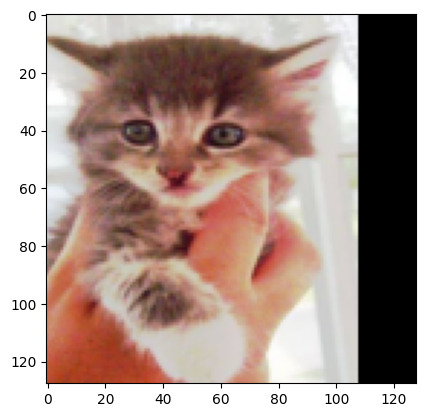

In [ ]:
plt.imshow(test_img.permute(1,2,0))

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = 32, shuffle = True)

In [ ]:
from typing import Tuple, Dict, List
train_data.classes, train_data.class_to_idx

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

In [ ]:
img, label = next(iter(train_loader))
img, label

(tensor([[[[0.4471, 0.4392, 0.4392,  ..., 0.8824, 0.9647, 0.9922],
           [0.4275, 0.4392, 0.4392,  ..., 0.8980, 0.9804, 0.9922],
           [0.4118, 0.4392, 0.4392,  ..., 0.8471, 0.9804, 0.9882],
           ...,
           [0.2667, 0.2627, 0.2627,  ..., 0.7020, 0.6980, 0.6824],
           [0.2627, 0.2588, 0.2588,  ..., 0.6863, 0.6980, 0.6902],
           [0.2510, 0.2588, 0.2627,  ..., 0.6824, 0.6902, 0.6863]],
 
          [[0.4471, 0.4392, 0.4392,  ..., 0.8471, 0.9608, 0.9686],
           [0.4275, 0.4392, 0.4392,  ..., 0.8588, 0.9765, 0.9725],
           [0.4118, 0.4392, 0.4392,  ..., 0.8196, 0.9765, 0.9765],
           ...,
           [0.2667, 0.2627, 0.2627,  ..., 0.5137, 0.5098, 0.4941],
           [0.2627, 0.2588, 0.2588,  ..., 0.4980, 0.5098, 0.5020],
           [0.2510, 0.2588, 0.2627,  ..., 0.4941, 0.5020, 0.4980]],
 
          [[0.4392, 0.4314, 0.4314,  ..., 0.7686, 0.9255, 0.9725],
           [0.4196, 0.4314, 0.4314,  ..., 0.7843, 0.9373, 0.9765],
           [0.4039, 0.43

In [ ]:
#building model class:
class CNN_Model_custom(nn.Module):
  def __init__(self,
               input_channels: int,
               hidden_units: int,
               output_channels: int,
               ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_channels, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.AvgPool2d(kernel_size = 2, stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Dropout(0.5),
        nn.Linear(in_features = hidden_units*16*16, out_features = output_channels),
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.conv_block_3(x)
    x = self.classifier(x)
    return x

In [ ]:
model_0 = CNN_Model_custom(input_channels = 3, hidden_units = 10, output_channels = 2).to(device)
model_0

CNN_Model_custom(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequentia

In [ ]:
#creating training function
from tqdm import tqdm

#training step:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  model.to(device)
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    #calculate loss, optimizer
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item() / len(y_pred)


  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


#testing step:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device: torch.device = device):
  model.to(device)
  model.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
            test_acc += (test_pred_class == y).sum().item() / len(y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc


In [ ]:
#training function:
def train_function(model: torch.nn.Module,
                   loss_fn: torch.nn.Module,
                   trainloader: torch.utils.data.DataLoader,
                   testloader: torch.utils.data.DataLoader,
                   optimizer: torch.optim.Optimizer = None,
                   EPOCHS: int = 5 ,
                   device: torch.device = device):
  results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
  for epoch in tqdm(range(EPOCHS)):
    print(f"Training -> Epoch: {epoch+1}")
    train_loss, train_acc =  train_step(model = model, loss_fn = loss_fn, dataloader = trainloader, optimizer = optimizer, device = device)
    test_loss, test_acc = test_step(model = model, loss_fn = loss_fn, dataloader = testloader, device = device)
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    print(f"Epoch: {epoch+1} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
  return results



In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUMS_EPOCHS = 5
device = torch.device(device)
train_results = train_function(model = model_0,
                                  loss_fn = loss_fn,
                                  optimizer = optimizer,
                                  trainloader = train_loader,
                                  testloader= test_loader,
                                  EPOCHS = NUMS_EPOCHS,
                                  device = device)
if results_model_0:
  for k,v in train_results.items():
    results_model_0[k].extend(v)
else:
  results_model_0 = train_results


  0%|          | 0/5 [00:00<?, ?it/s]

Training -> Epoch: 1


  0%|          | 0/5 [01:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
torch.save({
    'model_state_dict': model_0.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'checkpoint.pth')



In [ ]:
# Load lại khi cần tiếp tục train
checkpoint = torch.load('checkpoint.pth')
model_0.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
import matplotlib.pyplot as plt
from typing import Dict, List

def plot_curve(results: Dict[str, List[float]]):
    loss = results["train_loss"]
    test_loss = results["test_loss"]
    accuracy = results["train_acc"]
    test_acc = results["test_acc"]

    epochs = len(results["train_acc"])

    plt.figure(figsize=(15, 7))

    # Biểu đồ Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), loss, label="Train Loss", marker='o')
    plt.plot(range(1, epochs+1), test_loss, label="Test Loss", marker='s')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # Biểu đồ Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), accuracy, label="Train Accuracy", marker='o')
    plt.plot(range(1, epochs+1), test_acc, label="Test Accuracy", marker='s')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
results_model_0

{'train_loss': [0.6796809104919433,
  0.5639818881034852,
  0.5141591425895691,
  0.4844216634273529,
  0.4672821730852127,
  [0.4793346739768982,
   0.46426776473522186,
   0.43738534367084503,
   0.4174191264629364,
   0.40288853816986087]],
 'train_acc': [0.63505,
  0.70865,
  0.74525,
  0.7681,
  0.782,
  [0.7674, 0.77775, 0.78995, 0.8056, 0.8137]],
 'test_loss': [0.662286801892481,
  0.5027732144875131,
  0.47033077535355927,
  0.44495606669195137,
  0.43159739312472617,
  [0.4589090123298062,
   0.44873241842932005,
   0.3922972634529612,
   0.39070125256374383,
   0.36578489498347994]],
 'test_acc': [0.5997213375796179,
  0.7577627388535032,
  0.7716958598726115,
  0.7894108280254777,
  0.8075238853503185,
  [0.7872213375796179,
   0.7953821656050956,
   0.8232484076433121,
   0.8222531847133758,
   0.84375]]}

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

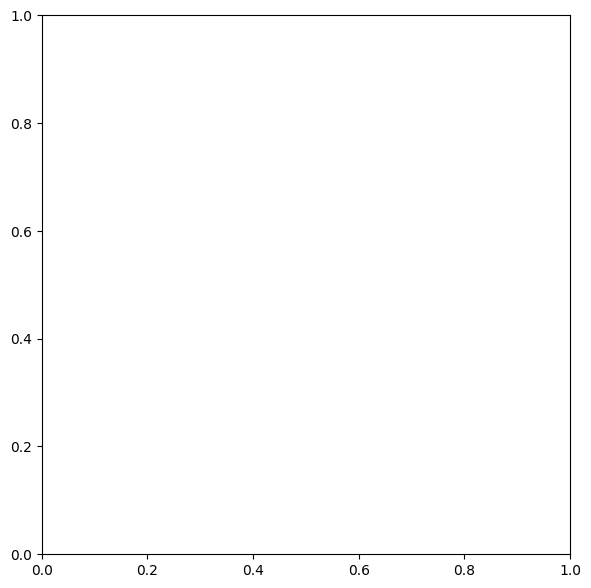

In [ ]:
plot_curve(results_model_0)

#DEPLOY

In [ ]:
import torchvision

image_path = "test.jpg"
# Load in custom image and convert the tensor values to float32
image = torchvision.io.read_image(str(image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
image = image / 255.

In [ ]:
deploy_transforms = transforms.Compose([
    transforms.Resize((128,128)),
])
image  = deploy_transforms(image).unsqueeze(0).to(device)

In [ ]:
pred

tensor([[ 0.2394, -0.2575]], device='cuda:0', grad_fn=<AddmmBackward0>)

PREDICT:  cats


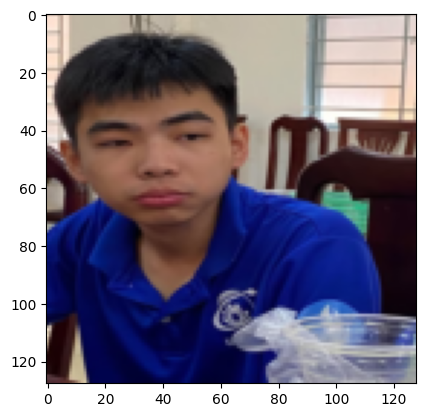

In [ ]:
pred = model_0(image)
class_pred = torch.argmax(torch.softmax(pred, dim=1), dim=1)
plt.imshow(image.squeeze().permute(1,2,0).cpu())
print("PREDICT: ",train_data.classes[class_pred])

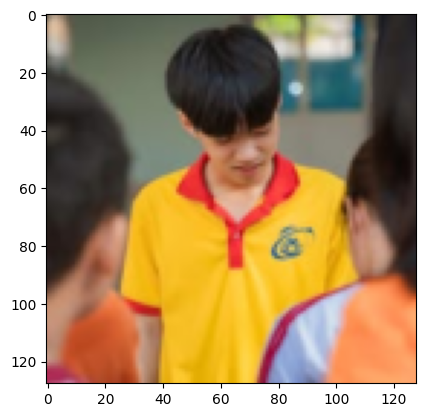